<a href="https://colab.research.google.com/github/seo-jeong-bang/like_code/blob/main/%EB%8B%B9%EB%87%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%96%91%EC%84%B1%2C%EC%9D%8C%EC%84%B1_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1. 데이터 불러오기

In [3]:
df=pd.read_csv('/content/diabetes.csv')

###1.1 head, info, desc 등

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies: 임신 횟수

glucose: 경구 포도당 내성 검사에서 2시간 동안의 혈장 포도당 농도

blood pressure: 이완기 혈압 (mm Hg)

skin thickness (mm): 삼두근 피부 주름 두께

insulin: 2시간 혈청 인슐린 (mu U/ml)

BMI: Body mass index(체질량 지수) (weight in kg/(height in m)^2)

Diabetes pedigree function: 당뇨병 가계도 기능

Age (years):나이

Class variable (0 or 1): 양성(1), 음성(0)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###1.2 인덱스 별 최대값 최소값 그리고 이상치 값 확인 ( 막대그래프 )

min을 살펴보면 0이 나올 수 없는 항목에 0이 존재함을 알 수 있다. 이는 결측치가 0으로 대체되어 있기 때문이다.min이 0인 항목을 보면 Pregnancies,Glucose 와 같이 0이 될 수 있는 항목들도 있지만, BloodPressure,SkinThickness,Insulin,BMI 와 같이 0이 될 수 없는 항목이 존재하기 때문에 결측치를 대체해주어야한다.

*인슐린의 경우 인슐린을 체내에서 생성하지 않는 경우도 있기 때문에 0인 데이터가 존재할 수 있다. 인슐린이 생성되지 않는 경우 1형 당뇨에 속하는데, 1형 당뇨의 경우 소아당뇨 또는 BMI지수가 정상범위에 속하지 않는 (저체중) 경우에만 해당하므로 age의 min이 21, BMI의 25%가 비만에 속하는 27.3 인 우리의 데이터의 경우 1형당뇨에 속하지 않는다.

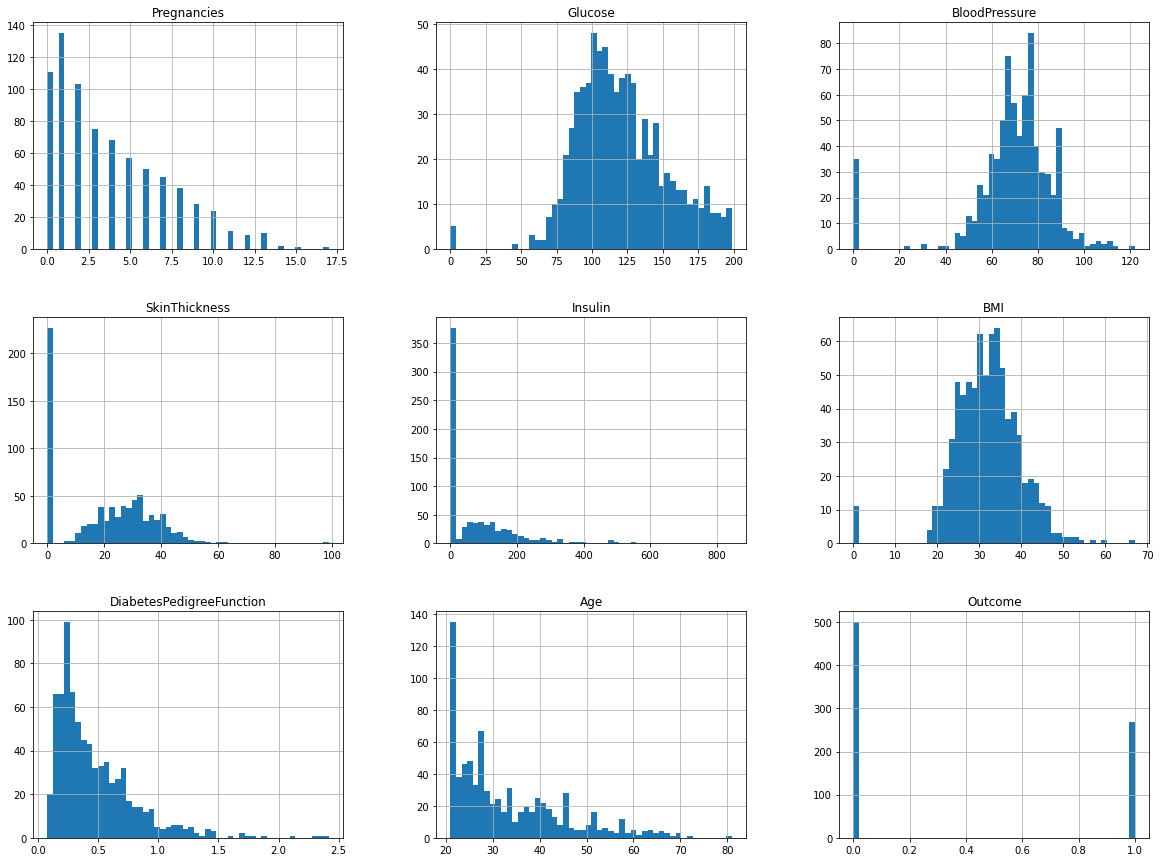

In [7]:
df.hist(bins=50,figsize=(20,15))
plt.show()

히스토그램을 살펴보니, 값이 고루 분포되어 있지 않고 한 곳에 치우친 것을 확인할 수 있다. 따라서 이상치를 중앙값으로 대체하였다.

##2. 전처리

### 2.1 이상치 대체 및 이상치 처리 방법 주석으로 작성

먼저, 0이 나올 수 없는 항목인 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' 의 0값을 결측치로 판단하여 NaN으로 대체하였다.

In [8]:
df.replace({'Glucose':{0:np.NaN},
            'BloodPressure':{0:np.NaN},
            'SkinThickness':{0:np.NaN},
            'Insulin':{0:np.NaN},
            'BMI':{0:np.NaN}}, inplace = True)

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [10]:
#0을 NaN값으로 대체 후 중앙값 확인
print(df['Glucose'].median())
print(df['BloodPressure'].median())
print(df['SkinThickness'].median())
print(df['Insulin'].median())
print(df['BMI'].median())

117.0
72.0
29.0
125.0
32.3


###2.2 outcome 양성,음성으로 데이터프레임 분류

In [12]:
df_1= df[df['Outcome']==1]
df_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
757,0,123.0,72.0,NaN,NaN,36.3,0.258,52,1
759,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1


In [13]:
#양성 데이터의 NaN값을 중앙값으로 대체
df_1["Glucose"].fillna(df_1["Glucose"].median(), inplace = True)
df_1["BloodPressure"].fillna(df_1["BloodPressure"].median(), inplace = True)
df_1["SkinThickness"].fillna(df_1["SkinThickness"].median(), inplace = True)
df_1["Insulin"].fillna(df_1["Insulin"].median(), inplace = True)
df_1["BMI"].fillna(df_1["BMI"].median(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [14]:
df_0= df[df['Outcome']==0]
df_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0


In [15]:
#음성 데이터의 NaN값을 중앙값으로 대체
df_0["Glucose"].fillna(df_0["Glucose"].median(), inplace = True)
df_0["BloodPressure"].fillna(df_0["BloodPressure"].median(), inplace = True)
df_0["SkinThickness"].fillna(df_0["SkinThickness"].median(), inplace = True)
df_0["Insulin"].fillna(df_0["Insulin"].median(), inplace = True)
df_0["BMI"].fillna(df_0["BMI"].median(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [16]:
#중앙값으로 대체한 데이터프레임을 하나로 합침
df = pd.concat([df_1,df_0])
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    169.5  33.6   
2              8    183.0           64.0           32.0    169.5  23.3   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
..           ...      ...            ...            ...      ...   ...   
762            9     89.0           62.0           27.0    102.5  22.5   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    102.5  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
767            1     93.0           70.0           31.0    102.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
2                  

###2.3 수치형 데이터 scaler

In [46]:
x= df.drop(columns=['Outcome'],axis=1)
y=df['Outcome']

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
scaler.fit(x)

StandardScaler()

In [48]:
standarized_data = scaler.transform(x)

In [49]:
print(standarized_data)

[[ 0.63994726  0.86462486 -0.03218035 ...  0.16948251  0.46849198
   1.4259954 ]
 [ 1.23388019  2.01426457 -0.69343821 ... -1.32847775  0.60439732
  -0.10558415]
 [-1.14185152  0.50330953 -2.67721176 ...  1.55109634  5.4849091
  -0.0204964 ]
 ...
 [-0.54791859  0.01060679 -0.19749482 ...  0.63486822 -0.39828208
  -0.53102292]
 [ 0.3429808  -0.02224005 -0.03218035 ... -0.90672195 -0.68519336
  -0.27575966]
 [-0.84488505 -0.94195182 -0.19749482 ... -0.2959032  -0.47378505
  -0.87137393]]


In [50]:
x=standarized_data
y=df['Outcome']

###2.4 train,test 데이터 분리

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

##3.시각화



###3.1 각 인덱스별 관련도 알아보기 ( outcome과의 연관도, 각 인덱스별 연관도 히트맵으로 그리기)

In [17]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


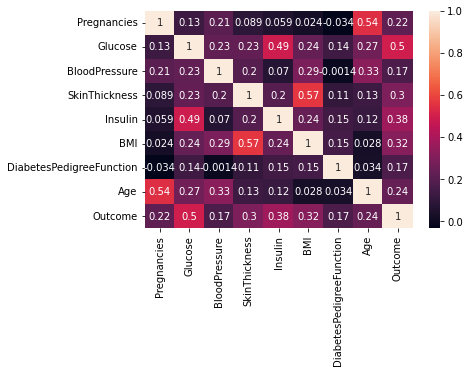

In [18]:
#히트맵으로 연관도 확인
sns.heatmap(df.corr(), annot = True)
plt.show()
# SkinThickness & BMI : 0.57
# Pregnancies & Age : 0.54
# Outcome & Glucose : 0.5

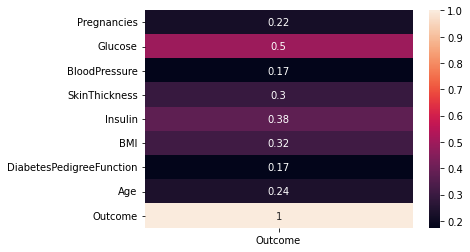

In [19]:
sns.heatmap(df.corr()[['Outcome']],annot=True)
plt.show()

In [20]:
df.corr()["Outcome"].sort_values(ascending=False)
#Glucose                     0.495990
#Insulin                     0.377081
#BMI                         0.315577
#SkinThickness               0.295138
#Age                         0.238356

Outcome                     1.000000
Glucose                     0.495990
Insulin                     0.377081
BMI                         0.315577
SkinThickness               0.295138
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.174469
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64

###3.2 당뇨와 가장 연관도 높은 5가지 유형을 막대그래프로 시각화 ( 당뇨음성 - 유형1, 당뇨양성 - 유형1 )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_

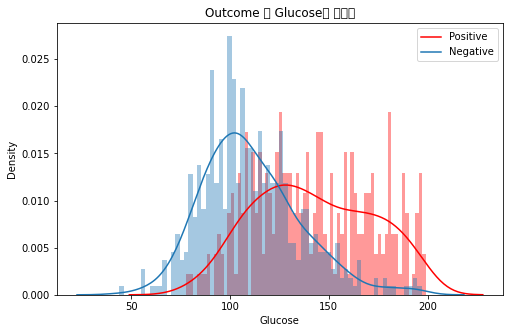

In [34]:

plt.figure(figsize = (8,5))
plt.title('Outcome & Glucose의 분포')
sns.distplot(df['Glucose'][df['Outcome'] == 1], bins =70, color = 'r',)
sns.distplot(df['Glucose'][df['Outcome'] == 0], bins =70)
plt.legend(labels = ['Positive','Negative'], loc = 'upper right')

음성 데이터의 경우 Glucose 수치가 양성 데이터보다 낮은 것을 볼 수 있었으며 100-150사이의 경우 양성과 음성이 고루 분포되어있다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text

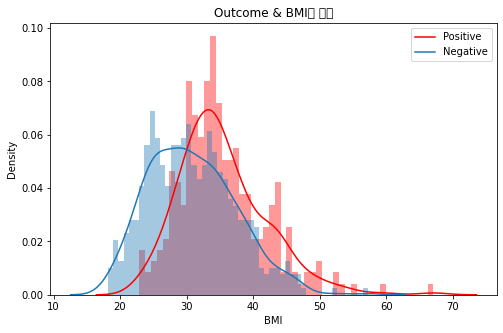

In [35]:
plt.figure(figsize = (8,5))
sns.distplot(df['BMI'][df['Outcome'] == 1], bins = 50, color = 'r')
sns.distplot(df['BMI'][df['Outcome'] == 0], bins = 50)
plt.title('Outcome & BMI의 분포')
plt.legend(labels = ['Positive','Negative'], loc = 'upper right')

BMI지수가 30미만인 데이터의 경우 대부분이 음성데이터이며 이는 BMI지수가 높을수록 양성일 확률이 높아진다는 사실을 알 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text

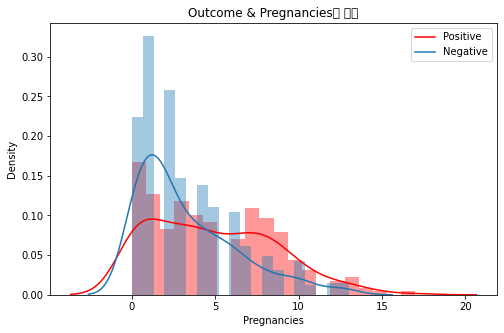

In [37]:
plt.figure(figsize = (8,5))
sns.distplot(df['Pregnancies'][df['Outcome'] == 1], bins = 20, color = 'r')
sns.distplot(df['Pregnancies'][df['Outcome'] == 0], bins = 20)
plt.title('Outcome & Pregnancies의 분포')
plt.legend(labels = ['Positive','Negative'], loc = 'upper right')

당뇨와 임신의 횟수의 경우 5번미만의 경우 양성과 음성 데이터가 모두 존재하기 때문에 상관관계가 뚜렷하다고 볼 수 없지만 5번이상의 경우 확연히 양성데이터가 늘어남을 볼 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text

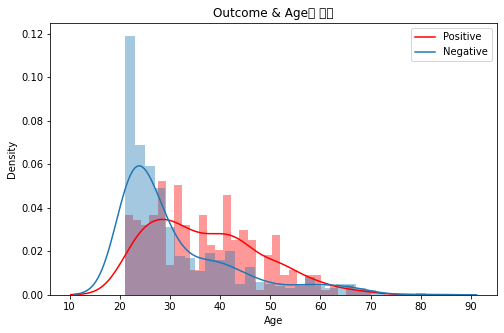

In [38]:
plt.figure(figsize = (8,5))
sns.distplot(df['Age'][df['Outcome'] == 1], bins = 30, color = 'r')
sns.distplot(df['Age'][df['Outcome'] == 0], bins = 30)
plt.title('Outcome & Age의 분포')
plt.legend(labels = ['Positive','Negative'], loc = 'upper right')

양성 데이터가 30대 이후에 많이 분포되어있는 것을 보아 30대 이후에 당뇨 발병률이 상승한다는 사실을 알 수 있다.

##모델링

In [60]:
#그래프 설정
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 3, label= label)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlabel("False Positive Rate", fontname = "monospace", fontsize = 15 )
    plt.ylabel("True Positive Rate(Recall)", fontname = "monospace", fontsize = 15 )
    plt.title("ROC Curve", fontname = "monospace", fontsize = 17)
    plt.axis([0, 1, 0, 1])
    plt.show()

###4.1 모델 훈련

4.1.1 LogisticRegression

In [52]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve


from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, confusion_matrix,\
roc_curve
from sklearn.model_selection import cross_val_predict



log_reg_clf=LogisticRegression(random_state=42 , max_iter=500)
log_reg_pred = cross_val_predict(log_reg_clf, x_train, y_train, cv = 5)


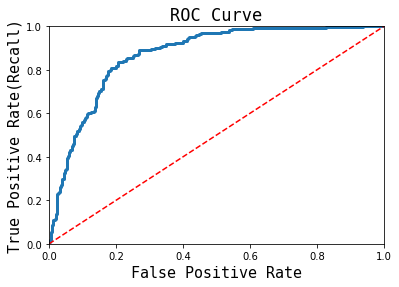

In [63]:
log_reg_scores = cross_val_predict(log_reg_clf, x_train, y_train, cv = 3, method = "decision_function")
log_reg_fpr, log_reg_tpr,_ = roc_curve(y_train, log_reg_scores)
plot_roc_curve(log_reg_fpr, log_reg_tpr)

In [55]:
log_reg_auc = roc_auc_score(y_train, log_reg_scores)
log_reg_auc

0.870591417449696

그리드 서치

In [56]:
log_reg_param_grid = [
    {
        "C": [0.25, 0.5, 1, 2,3]
    }
]

In [75]:
from sklearn.model_selection import GridSearchCV
log_reg_grid_search = GridSearchCV(log_reg_clf, log_reg_param_grid,
                                   cv = 3, scoring = "roc_auc",
                                   return_train_score = True)
log_reg_grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, random_state=42),
             param_grid=[{'C': [0.25, 0.5, 1, 2, 3]}], return_train_score=True,
             scoring='roc_auc')

In [76]:
log_reg_grid_search.best_estimator_

LogisticRegression(C=1, max_iter=500, random_state=42)

In [77]:
log_reg_grid_search.best_score_

0.8716731752223309

4.1.2 svc

In [64]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train,y_train)


SVC()

In [65]:
svm_clf = SVC(random_state = 42)
svm_clf.fit(x_train,y_train)

SVC(random_state=42)

In [68]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, x_train, y_train, cv = 5, scoring='accuracy')

array([0.8699187 , 0.81300813, 0.78861789, 0.8699187 , 0.87704918])

In [67]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, x_train, y_train, cv = 5, scoring='roc_auc')

array([0.94476744, 0.89564962, 0.7989418 , 0.9271017 , 0.9202381 ])

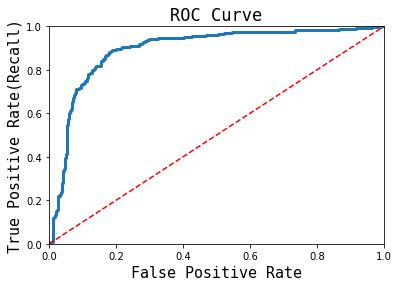

In [69]:
svm_clf_scores = cross_val_predict(svm_clf, x_train, y_train, cv = 5, method = "decision_function")
svm_fpr, svm_tpr, _ = roc_curve(y_train, svm_clf_scores)
plot_roc_curve(svm_fpr, svm_tpr)

In [70]:
svm_param_grid = {
    "kernel": ["rbf", "linear"],
    "C":[1, 5, 10, 20]
}

그리드서치

In [71]:
svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv = 5,
                               scoring = "roc_auc",
                               return_train_score = True)
svm_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 5, 10, 20], 'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='roc_auc')

In [78]:
svm_grid_search.best_estimator_

SVC(C=1, random_state=42)

In [79]:
svm_grid_search.best_score_

0.8973397317583365

4.1.3 sgd

In [80]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf_pred = cross_val_predict(sgd_clf, x_train, y_train, cv = 5)

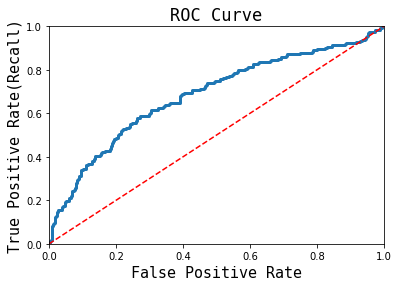

In [81]:
sgd_clf_scores = cross_val_predict(sgd_clf, x_train, y_train, cv = 5, method = "decision_function")
sgd_clf_fpr, sgd_clf_tpr, _ = roc_curve(y_train, sgd_clf_scores)
plot_roc_curve(sgd_clf_fpr, sgd_clf_tpr)

In [82]:
sgd_auc = roc_auc_score(y_train, sgd_clf_scores)
sgd_auc

0.6851692872179035

4.1.4 DecisionTreeClassifier

In [102]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state = 42)


그리드서치

In [103]:
paramaters = {'criterion':['gini','entropy'],
              'splitter' : ['best', 'random'],
              'min_samples_split':[1,2,5,10], 
              'max_depth':[None,2], 
              'min_samples_leaf':[10,15,20,30,50], 
              'max_features':[None,'sqrt','log2']}

In [104]:
dt_grid_search = GridSearchCV(dt_clf, paramaters, cv = 3, 
                    scoring = "roc_auc", return_train_score = True)
dt_grid_search.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 15, 20, 30, 50],
                         'min_samples_split': [1, 2, 5, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='roc_auc')

In [106]:
print('final params', dt_grid_search.best_params_)


final params {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'best'}


In [107]:
print('best_score', dt_grid_search.best_score_)

best_score 0.9299291473921844


4.1.5 랜덤 포레스트

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

그리드서치

In [111]:
paramaters = {'criterion':['gini','entropy'],
              'n_estimators':[50, 100, 150],
              'min_samples_split':[2,5,10,15], 
              'max_depth':[None,2], 
              'min_samples_leaf':[1,3,10,15], 
              'max_features':[None,'sqrt','log2']}

In [113]:
rf_grid_search = GridSearchCV(rf, paramaters, cv = 5, scoring = "roc_auc")
rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [114]:
print('final params', rf_grid_search.best_params_)
print('best score', rf_grid_search.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 100}
best score 0.9536515797820708




1.  LogisticRegression = 0.8716731752223309
2.  SVC = 0.8973397317583365
3.  SGD = 0.6851692872179035
4.  DecisionTreeClassifier = 0.9299291473921844
5.  RandomForestClassifier = 0.9536515797820708





In [115]:
rf_grid_search = GridSearchCV(rf, paramaters, cv = 5, scoring = "roc_auc")
rf_grid_search.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [117]:
print('best score', rf_grid_search.best_score_)

best score 0.9286443381180224
